In [1]:
PREPROC_TRAIN_DATA = True

In [2]:
import tensorflow as tf
from gradient_accumulator.GAModelWrapper import GAModelWrapper


model = tf.keras.models.load_model('best_model.h5', custom_objects={'GAModelWrapper': GAModelWrapper})


# model = tf.keras.models.load_model("best_model.h5", compile=False)

2022-12-28 10:49:50.691556: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-28 10:49:50.750784: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-28 10:49:50.750983: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-28 10:49:50.751911: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
import pandas as pd
if PREPROC_TRAIN_DATA:
    df = pd.read_csv("/media/viktor/T7/gravitational-waves-kaggle-2022/kaggle-data/preprocessed/train-preprocessed.csv")
else:
    df = pd.read_csv("/media/viktor/T7/gravitational-waves-kaggle-2022/kaggle-data/preprocessed/test-preprocessed.csv")
df

,Unnamed: 0,id,target,filename,name,preprocessed_filename
0,0,001121a05,1,/media/viktor/T7/gravitational-waves-kaggle-20...,001121a05,/media/viktor/T7/gravitational-waves-kaggle-20...
1,1,004f23b2d,1,/media/viktor/T7/gravitational-waves-kaggle-20...,004f23b2d,/media/viktor/T7/gravitational-waves-kaggle-20...
2,2,00a6db666,1,/media/viktor/T7/gravitational-waves-kaggle-20...,00a6db666,/media/viktor/T7/gravitational-waves-kaggle-20...
3,3,00f36a6ac,1,/media/viktor/T7/gravitational-waves-kaggle-20...,00f36a6ac,/media/viktor/T7/gravitational-waves-kaggle-20...
4,4,010a387db,1,/media/viktor/T7/gravitational-waves-kaggle-20...,010a387db,/media/viktor/T7/gravitational-waves-kaggle-20...
...,...,...,...,...,...,...
595,595,fe38dbe64,1,/media/viktor/T7/gravitational-waves-kaggle-20...,fe38dbe64,/media/viktor/T7/gravitational-waves-kaggle-20...
596,596,feafd0d16,1,/media/viktor/T7/gravitational-waves-kaggle-20...,feafd0d16,/media/viktor/T7/gravitational-waves-kaggle-20...
597,597,feeca844e,1,/media/viktor/T7/gravitational-waves-kaggle-20...,feeca844e,/media/viktor/T7/gravitational-waves-kaggle-20...
598,598,ff5ad023f,1,/media/viktor/T7/gravitational-waves-kaggle-20...,ff5ad023f,/media/viktor/T7/gravitational-waves-kaggle-20...


In [4]:
# Replace "/media/viktor/T7/gravitational-waves-kaggle-2022/train" with "/media/viktor/T7/gravitational-waves-kaggle-2022/kaggle-data/preprocessed/train" in preprocessed_filename
df["preprocessed_filename"] = df["preprocessed_filename"].apply(lambda x: x.replace("/media/viktor/T7/gravitational-waves-kaggle-2022", "/media/viktor/T7/gravitational-waves-kaggle-2022/kaggle-data/preprocessed"))

In [5]:
# Loop over the dataset and make predictions: save the predictions to a list and create a column in the dataframe
# with the predictions
import numpy as np
from tqdm import tqdm
predictions = []
for i in tqdm(range(len(df))):
    
    # Get the path to the file
    path = df.iloc[i]["preprocessed_filename"]
    # Load the data
    data = np.load(path)
    # expand the dimensions
    data = np.expand_dims(data, axis=0)
    
    # data = data - np.min(data)
    data = 2 * data / np.max(data)  - 1
    
    # Make a prediction
    prediction = model.predict(data, verbose=0)
    # Save the prediction
    predictions.append(prediction[0][0])
    
    if i % 1000 == 0:
        # clear backed memory
        tf.keras.backend.clear_session()
    
df["prediction"] = predictions
df

  0%|          | 0/600 [00:00<?, ?it/s]2022-12-28 10:50:00.105997: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204
2022-12-28 10:50:01.554038: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.05GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-12-28 10:50:01.554074: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.05GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-12-28 10:50:01.675223: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.08GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mea

,Unnamed: 0,id,target,filename,name,preprocessed_filename,prediction
0,0,001121a05,1,/media/viktor/T7/gravitational-waves-kaggle-20...,001121a05,/media/viktor/T7/gravitational-waves-kaggle-20...,0.424291
1,1,004f23b2d,1,/media/viktor/T7/gravitational-waves-kaggle-20...,004f23b2d,/media/viktor/T7/gravitational-waves-kaggle-20...,0.429852
2,2,00a6db666,1,/media/viktor/T7/gravitational-waves-kaggle-20...,00a6db666,/media/viktor/T7/gravitational-waves-kaggle-20...,0.728445
3,3,00f36a6ac,1,/media/viktor/T7/gravitational-waves-kaggle-20...,00f36a6ac,/media/viktor/T7/gravitational-waves-kaggle-20...,0.407323
4,4,010a387db,1,/media/viktor/T7/gravitational-waves-kaggle-20...,010a387db,/media/viktor/T7/gravitational-waves-kaggle-20...,0.404847
...,...,...,...,...,...,...,...
595,595,fe38dbe64,1,/media/viktor/T7/gravitational-waves-kaggle-20...,fe38dbe64,/media/viktor/T7/gravitational-waves-kaggle-20...,0.433459
596,596,feafd0d16,1,/media/viktor/T7/gravitational-waves-kaggle-20...,feafd0d16,/media/viktor/T7/gravitational-waves-kaggle-20...,0.409573
597,597,feeca844e,1,/media/viktor/T7/gravitational-waves-kaggle-20...,feeca844e,/media/viktor/T7/gravitational-waves-kaggle-20...,0.413010
598,598,ff5ad023f,1,/media/viktor/T7/gravitational-waves-kaggle-20...,ff5ad023f,/media/viktor/T7/gravitational-waves-kaggle-20...,0.495701


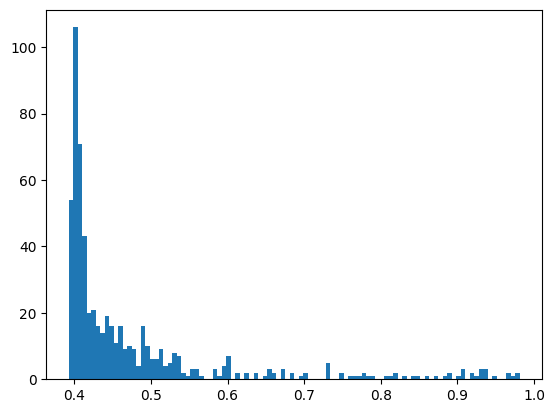

In [6]:
import matplotlib.pyplot as plt
plt.hist(df["prediction"], bins=100);

In [12]:
# calculate auc
from sklearn.metrics import roc_auc_score
if PREPROC_TRAIN_DATA:
    print(roc_auc_score(df["target"], df["prediction"]))

0.6002125


In [8]:
df_sub = df[["name", "prediction"]]
# rename prediction to target
df_sub = df_sub.rename(columns={"prediction": "target",
                                "name": "id"})


# if PREPROC_TRAIN_DATA == False:
#     df_blend = pd.read_csv("blending_submission.csv")
    
#     # sort by id
#     df_blend = df_blend.sort_values(by="id")
#     # sort df by id
#     df_sub = df_sub.sort_values(by="id")
    
#     df['target'] = 0.5 * df_sub['target'] + 0.5 * df_blend['target']
    
    


df_sub.to_csv("submission.csv", index=False)
df_sub

,id,target
0,001121a05,0.424291
1,004f23b2d,0.429852
2,00a6db666,0.728445
3,00f36a6ac,0.407323
4,010a387db,0.404847
...,...,...
595,fe38dbe64,0.433459
596,feafd0d16,0.409573
597,feeca844e,0.413010
598,ff5ad023f,0.495701


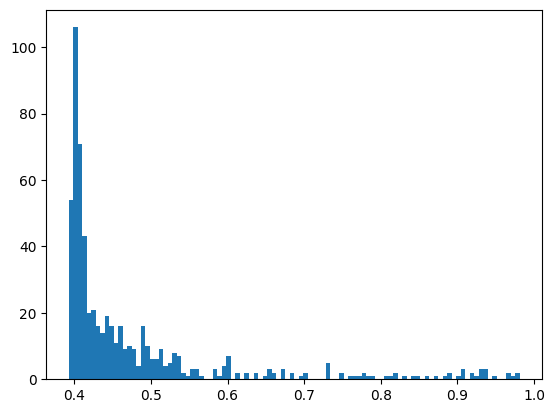

In [9]:
plt.hist(df_sub["target"], bins=100);

In [10]:
if PREPROC_TRAIN_DATA:
    df.to_csv("train_predictions.csv", index=False)
else:
    df.to_csv("test_predictions.csv", index=False)

In [11]:
import tensorflow as tf

def largeKernelInitializer():
    inputs = tf.keras.layers.Input(shape=(360, 256, 2))
    x = tf.keras.layers.Conv2D(2, (31, 31), strides=(2, 2), padding="same", kernel_initializer="he_normal")(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.Conv2D(2, (31, 31), strides=(1, 1), padding="same", kernel_initializer="he_normal")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)
    return tf.keras.models.Model(inputs=inputs, outputs=x, name="largeKernelInitializer")


def create_model():
    base_model = tf.keras.applications.ResNet152V2(include_top=False, 
                            weights=None, 
                                input_tensor=tf.keras.Input(shape=(180, 128, 2))
                                )
    inputs = tf.keras.layers.Input(shape=(360, 256, 2))
    x = largeKernelInitializer()(inputs)
    x = base_model(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(1, activation="sigmoid")(x)
    model = tf.keras.models.Model(inputs=inputs, outputs=x)
    return model

model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 360, 256, 2)]     0         
                                                                 
 largeKernelInitializer (Fun  (None, 180, 128, 2)      7708      
 ctional)                                                        
                                                                 
 resnet152v2 (Functional)    (None, 6, 4, 2048)        58328512  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization_2 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                             